In [301]:
import sys
sys.path.append('..')

import os
import pickle
from glob import glob
import argparse
from multiprocessing import Pool

import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from matplotlib import font_manager
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick

from tqdm import tqdm

from units import *
from cdisk_analysis import *

In [302]:
def get_hill_radius(semi_major_axis, planet_mass, star_mass):
    return semi_major_axis * np.power(planet_mass/(3*star_mass), 1/3)

In [303]:
def get_aspect_ratio(r, mass_accretion, planet_mass, hill_radius):
    mu = 2.4 # g/mol
    a = (kb_cgs / (G_cgs*planet_mass*mu))  * 6.022e23
    b = 3 * G_cgs * planet_mass * mass_accretion * r / (8*np.pi*stefan_cgs)
    c = np.sqrt(hill_radius/r) - 1    
    return np.sqrt(a) * np.sqrt(np.power(b*c,1/4))

In [304]:
def get_surface_density(r, mass_accretion, hill_radius, viscosity):
    return mass_accretion / (3*np.pi*viscosity) * (np.sqrt(hill_radius/r) - 1)

In [305]:
def get_viscosity(r, alpha, scale_height, planet_mass):
    omega = np.sqrt(G_cgs * planet_mass/np.power(r,3))
    return alpha * omega * scale_height * scale_height

In [306]:
mass_accretion = 1e-7 * mass_accretion_conversion
planet_mass = 2 * MJ_to_g
planet_semi_major_axis = 5.2 * AU_to_cm
star_mass = 1047.57 * MJ_to_g
r_t = 5*RJ_to_cm
alpha = 1e-4

hill_radius = get_hill_radius(planet_semi_major_axis, planet_mass, star_mass)

r = np.linspace(r_t, hill_radius, 100)

In [307]:
viscosity = get_viscosity(r, alpha, r*aspect_ratio, planet_mass)
sigma = get_surface_density(r, mass_accretion, hill_radius, viscosity)

/tmp/ipykernel_26034/1459233990.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return mass_accretion / (3*np.pi*viscosity) * (np.sqrt(hill_radius/r) - 1)
/tmp/ipykernel_26034/1459233990.py:2: RuntimeWarning: invalid value encountered in multiply
  return mass_accretion / (3*np.pi*viscosity) * (np.sqrt(hill_radius/r) - 1)


In [308]:
font_path =  '../IBMPlexMono-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['savefig.facecolor'] = (1.0, 1.0, 1.0)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=('#6699CC', '#004488', '#EECC66', '#994455', '#997700', '#EE99AA', '#000000'))

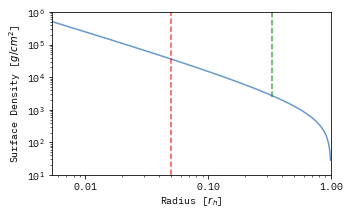

In [318]:
fig,ax = plt.subplots(figsize=(5,3))

ax.plot(r/hill_radius, sigma)
ax.axvline(1/20, linestyle= '--', color='red', alpha=0.7)
ax.axvline(1/3, linestyle= '--', color='green', alpha=0.7, ymin=0.48)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(r_t/hill_radius,1)
ax.set_ylim(1e1,1e6)

ax.set_xlabel('Radius [$r_h$]')
ax.set_ylabel('Surface Density [$g/cm^2$]')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

fig.show()


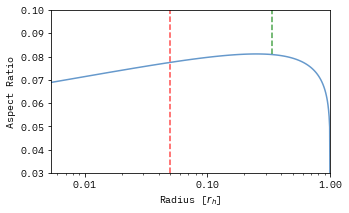

In [310]:
fig,ax = plt.subplots(figsize=(5,3))

aspect_ratio = get_aspect_ratio(r, mass_accretion, planet_mass, hill_radius)
ax.plot(r/hill_radius, aspect_ratio)

ax.axvline(1/20, linestyle= '--', color='red', alpha=0.7)
ax.axvline(1/3, linestyle= '--', color='green', alpha=0.7, ymin=0.73)


ax.set_xscale('log')
ax.set_xlim(r_t/hill_radius,1)
ax.set_ylim(0.03,0.1)
ax.set_xlabel('Radius [$r_h$]')
ax.set_ylabel('Aspect Ratio')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


fig.show()